# Introduction

Research question: What factors play a significant role in cancer death rates? 
I would assume by now that nearly every single person knows someone close to them that has been affected by cancer. Cancer research is something that has been going on for an extremely long time, but to no avail for a cure. It is a horrible disease that is incredibly painful for those with it. It's quite obvious as to why cancer research is important. 


The Data:
I found the data used through the sources the Professor included in the assignment; specifically, it is from data world. The creator of the data sourced it through cancer.gov, clinicaltrials.gov, and census.gov. 
The edits I made to the data was I removed all of the rows that had empty cells in them because this was effecting my attempts at using WLS. I did not remove any outliers and am not doing any sampling restrictions. I am planning to just utilize the variables in the data and see how they interact with the dependent variable in the regression. Also, I did not append other data sets because the one I am using is quite extensive to begin with, and in itself is created from multiple different government sources. 

#### Definitions of variables

TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)

avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)

incidenceRate: Mean per capita (100,000) cancer diagoses(a)

medianIncome: Median income per county (b)

popEst2015: Population of county (b)

povertyPercent: Percent of populace in poverty (b)

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

binnedInc: Median income per capita binned by decile (b)

MedianAge: Median age of county residents (b)

MedianAgeMale: Median age of male county residents (b)

MedianAgeFemale: Median age of female county residents (b)

Geography: County name (b)

AvgHouseholdSize: Mean household size of county (b)

PercentMarried: Percent of county residents who are married (b)

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

PctPrivateCoverage: Percent of county residents with private health coverage (b)

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

PctWhite: Percent of county residents who identify as White (b)

PctBlack: Percent of county residents who identify as Black (b)

PctAsian: Percent of county residents who identify as Asian (b)

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

PctMarriedHouseholds: Percent of married households (b)

BirthRate: Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates

Literature/Research: The data I gathered this from used it for regression analysis as well, so there is that in terms of previous work on the subject. While researching for other material on the matter of cancer death rate and ols regression, I came across this website https://www.rpubs.com/usnf002/ols_challenge where Steven Burnett actually used the same dataset I am. Burnett only used OLS for their model. The difference between mine and Burnett is that Burnett wanted to predict cancer mortality rates, whereas I am using OLS to identify factors that have the greatest effect on cancer mortality rate. I also want to note (although slightly irrelevant) that Burnett's work was done in R opposed to Python. 
More similar to my goals of findings was this paper by Shannon M. Stare and James J. Jozefowicz titled, "The Effects of Environmental Factors on Cancer Prevalence Rates and Specific Cancer Mortality Rates in a Sample of OECD Developed Countries". I say it is similar to mine only because they are looking at the regression results to interpret which factors of their model have a large effect on different types of cancer. Similar to me, they use OLS and WLS models. They extend their research beyond just general cancer rates, but specific environmental factors that are statistically significant for different types of cancer, which I found to be interesting. Their methods are well detailed and their results, in my opinion, are interpreted well. The link to their works is: http://conferencenow.info/yhsing/applied-economics-journals/ARCHIVE/ijae/index_files/IJAE%20SEPT%202008%20STARE%20JOZEFOWICZ%2010-24-08%20Cancer%20Paper%20-%20IJAE%20-%20Final.pdf

In [206]:
import csv
import numpy as np
import pandas as pd
from pandas import read_csv
import statsmodels.formula.api as sm
import math

## Cancer Data

Import csv

In [207]:
data = pd.read_csv('cancer_reg.csv',encoding='latin-1')

removing empty rows from data

In [208]:
# see which columns have empty cells and how many
#print(data.isnull().sum())
myData = data.dropna()
#Saving it to a new csv file 
myData.to_csv('myData.csv',index=False)
# Check to see if it worked 
#print(myData.isnull().sum())
myData=pd.read_csv('myData.csv')
#myData.head()
#len(myData)

591

Reindexing the data

In [222]:
myData.reindex(labels=None, index=None)



,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,wpovertyPercent,wstudyPerCap,wPctPrivateCoverage,wPctPrivateCoverageAlone,wPctEmpPrivCoverage,wPctPublicCoverage,wPctWhite_Square,wPctBlack_Cube,wPctAsian,wPctOtherRace
0,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,1.531803,1.903326,5.781322,4.430700,3.590679,2.561241,655.688133,0.074955,0.184989,0.308119
1,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,1.549498,31.047700,5.291852,3.651740,3.171487,4.104810,762.705169,0.043437,0.105235,0.123474
2,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,1.033384,0.000000,5.092516,3.629245,2.901742,3.637512,732.096136,0.001631,0.055045,0.040685
3,146.000000,71,183.6,404.000000,40189,20848,17.8,0.000000,"(37413.8, 40362.7]",51.7,...,1.330112,0.000000,4.169678,2.473411,1.935388,3.803523,597.321006,0.002123,0.141162,0.170842
4,2265.000000,901,171.0,440.700000,50083,490945,16.3,462.373586,"(48021.6, 51046.4]",37.2,...,1.689127,47.914578,6.756507,5.243547,4.404165,3.782401,821.536895,0.632004,0.240000,0.107112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,1962.667684,7,209.6,453.549422,45353,1843,11.4,0.000000,"(45201, 48021.6]",45.7,...,1.063594,0.000000,6.960013,4.916792,4.095772,3.004188,895.304028,0.000000,0.051058,0.092834
587,1962.667684,85,184.4,453.549422,45180,35788,15.0,1900.078239,"(42724.4, 45201]",38.2,...,2.125579,269.251086,9.777663,7.411185,6.546783,4.874661,1090.359059,4.505689,0.228196,0.268258
588,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,2.010578,40.337266,6.897992,5.700201,5.197557,3.080034,612.951919,1.347175,0.432586,1.511172
589,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,1.711377,224.642180,7.073692,6.001229,5.453588,3.034842,882.756569,1.412170,0.150199,0.648122


### Summary Statistics of Data

In [210]:
print(myData.describe(include='all'))

         avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count     591.000000        591.000000        591.000000     591.000000   
unique           NaN               NaN               NaN            NaN   
top              NaN               NaN               NaN            NaN   
freq             NaN               NaN               NaN            NaN   
mean      682.316495        199.411168        179.090863     452.657990   
std      1977.289390        708.330454         27.273580      54.381212   
min         6.000000          3.000000         94.400000     234.000000   
25%        87.000000         30.000000        161.350000     425.250000   
50%       183.000000         64.000000        177.900000     453.549422   
75%       542.000000        131.000000        195.400000     481.550000   
max     38150.000000      14010.000000        293.900000    1014.200000   

           medIncome    popEst2015  povertyPercent  studyPerCap  \
count     591.000000  5.910000e+

# OLS

### Model 1 


In [211]:
Model1 = sm.ols(formula="TARGET_deathRate ~ avgAnnCount + avgDeathsPerYear + incidenceRate + medIncome + povertyPercent + studyPerCap + MedianAge + MedianAgeMale + MedianAgeFemale + PctPrivateCoverage + PctWhite + PctBlack + PctAsian + PctOtherRace", data=myData).fit()
print(Model1.params)
print(Model1.summary())

Intercept             161.512128
avgAnnCount            -0.002252
avgDeathsPerYear        0.005774
incidenceRate           0.201692
medIncome              -0.000325
povertyPercent         -0.335082
studyPerCap            -0.001225
MedianAge              -0.014617
MedianAgeMale          -1.146296
MedianAgeFemale         0.846337
PctPrivateCoverage     -0.945133
PctWhite                0.230002
PctBlack                0.320969
PctAsian               -0.632677
PctOtherRace           -1.164112
dtype: float64
                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     24.49
Date:                Mon, 02 May 2022   Prob (F-statistic):           9.36e-50
Time:                        11:35:33   Log-Likelihood:                -2653.9
No. Observations

Creating new columns in hopes of improving model

In [212]:
myData['MedianAge_Square']=myData['MedianAge']**2
#print(data['MedianAge_Square'])
myData['MedianAgeMale_Square']=myData['MedianAgeMale']**2
#print(data['MedianAgeMale_Square'])
myData['MedianAgeFemale_Square']=myData['MedianAgeFemale']**2
#print(data['MedianAgeFemale_Square'])

### Model 2

In [213]:
Model2 = sm.ols(formula="TARGET_deathRate ~ avgAnnCount + avgDeathsPerYear + incidenceRate + medIncome + povertyPercent + studyPerCap + MedianAge_Square + MedianAgeMale_Square + MedianAgeFemale_Square + PctPrivateCoverage + PctWhite + PctBlack + PctAsian + PctOtherRace", data=myData).fit()
print(Model2.params)
print(Model2.summary())

Intercept                 161.896461
avgAnnCount                -0.002210
avgDeathsPerYear            0.005667
incidenceRate               0.200411
medIncome                  -0.000356
povertyPercent             -0.403387
studyPerCap                -0.001341
MedianAge_Square           -0.000028
MedianAgeMale_Square       -0.013404
MedianAgeFemale_Square      0.007742
PctPrivateCoverage         -0.956090
PctWhite                    0.237459
PctBlack                    0.330107
PctAsian                   -0.621786
PctOtherRace               -1.193660
dtype: float64
                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     24.57
Date:                Mon, 02 May 2022   Prob (F-statistic):           6.49e-50
Time:                        11:35:

### Model 3

In [214]:
Model3 = sm.ols(formula="TARGET_deathRate ~ avgAnnCount + avgDeathsPerYear + incidenceRate + medIncome + povertyPercent + studyPerCap + PctPrivateCoverage + PctWhite + PctBlack + PctAsian + PctOtherRace", data=myData).fit()
print(Model3.params)
print(Model3.summary())

Intercept             146.399445
avgAnnCount            -0.002185
avgDeathsPerYear        0.005532
incidenceRate           0.201210
medIncome              -0.000304
povertyPercent         -0.160557
studyPerCap            -0.001154
PctPrivateCoverage     -0.871744
PctWhite                0.182940
PctBlack                0.316935
PctAsian               -0.537750
PctOtherRace           -1.097776
dtype: float64
                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     30.37
Date:                Mon, 02 May 2022   Prob (F-statistic):           1.40e-50
Time:                        11:35:33   Log-Likelihood:                -2657.3
No. Observations:                 591   AIC:                             5339.
Df Residuals:                     57

Creating new columns based on pre-existing ones with hopes of improving model

In [215]:
myData['PctWhite_Square']=myData['PctWhite']**2
myData['PctBlack_Square']=myData['PctBlack']**2
myData['PctBlack_Cube']=np.power((myData['PctBlack']),3)
myData['PctAsian_Square']=myData['PctAsian']**2
myData['povertyPercent_Square']=myData['povertyPercent']**2
myData['povertyPercent_Cube']=np.power((myData['povertyPercent']),3)
myData['LN_avgAnnCount'] = np.log(myData['avgAnnCount'])
myData['LN_avgDeathsPerYear'] = np.log(myData['avgDeathsPerYear'])
myData['PctPublicCoverage_Square']=myData['PctPublicCoverage']**2
myData['PctPublicCoverageAlone_Square']=myData['PctPublicCoverageAlone']**2   

### Model 4

In [216]:
Model4 = sm.ols(formula="TARGET_deathRate ~ LN_avgAnnCount + LN_avgDeathsPerYear + incidenceRate + medIncome + povertyPercent + studyPerCap + PctPrivateCoverage + PctPrivateCoverageAlone + PctEmpPrivCoverage + PctPublicCoverage + PctWhite_Square + PctBlack_Cube + PctAsian + PctOtherRace", data=myData).fit()
print(Model4.params)
print(Model4.summary())

Intercept                  155.227136
LN_avgAnnCount              -1.545175
LN_avgDeathsPerYear          3.480224
incidenceRate                0.186986
medIncome                   -0.000564
povertyPercent              -0.265174
studyPerCap                 -0.002740
PctPrivateCoverage          -0.938639
PctPrivateCoverageAlone     -0.175493
PctEmpPrivCoverage           0.808364
PctPublicCoverage            0.323585
PctWhite_Square             -0.001007
PctBlack_Cube               -0.000016
PctAsian                    -1.439937
PctOtherRace                -1.363015
dtype: float64
                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     26.62
Date:                Mon, 02 May 2022   Prob (F-statistic):           1.26e-53
Time:               

### Model 5

I decided to do a quite different model because I realized at this point that average annual count and average. deaths per year are inherently connected to the dependent variable and wanted a model more like the one to follow. 

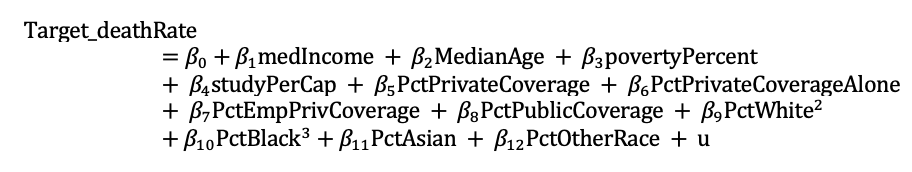

In [217]:
Model5 = sm.ols(formula="TARGET_deathRate ~ medIncome + MedianAge + povertyPercent + studyPerCap + PctPrivateCoverage + PctPrivateCoverageAlone + PctEmpPrivCoverage + PctPublicCoverage + PctWhite_Square + PctBlack_Cube + PctAsian + PctOtherRace", data=myData).fit()
print(Model5.params)
print(Model5.summary())

Intercept                  199.936249
medIncome                   -0.000567
MedianAge                   -0.007935
povertyPercent               0.028942
studyPerCap                 -0.000086
PctPrivateCoverage          -0.962276
PctPrivateCoverageAlone      0.168201
PctEmpPrivCoverage           1.219772
PctPublicCoverage            0.865217
PctWhite_Square             -0.002310
PctBlack_Cube               -0.000045
PctAsian                    -0.762389
PctOtherRace                -2.065460
dtype: float64
                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.06
Date:                Mon, 02 May 2022   Prob (F-statistic):           2.02e-31
Time:                        11:35:33   Log-Likelihood:                -2702.3
No. Observations:

Decide Model 5 will be used for the WLS. 

# start of WLS

Need to obtain the residuals from Model 5 and square them. Then take the natural log of the squared residuals.

In [223]:
uhat = Model5.resid
uhat2 = uhat*uhat
Lnuhat2 = np.log(uhat2)
len(uhat)
Lnuhat2.reindex(index=None)



0      3.370855
1      4.699682
2      7.065505
3      2.479970
4      4.074639
         ...   
586    7.453750
587    3.005484
588    4.195784
589    5.662960
590    8.410235
Length: 591, dtype: float64

#### FGLS & prediction of fitted values in order to define weight for WLS

For FGLS, I regress the natural log of the sqaured residuals from model 5 on all right hand side variables in model 5. 

Then, obtain the fitted values from the FGLS regression, I call this yhatstar (yhatstar=lnuhat2HAT). Since the dependent variable is in log form I need to take the exponential of the fitted values (e^yhatstar = e^lnuhat2HAT = uhat2HAT). 

To create the weight I do 1 over the sqaure root of the exponential fitted values (1/sqrt(uhat2HAT))

I created a column in the data for the weight to make sure the weighted variables would be easy to create.  

In [219]:
FGLS = sm.ols(formula="Lnuhat2 ~ medIncome + MedianAge + povertyPercent + studyPerCap + PctPrivateCoverage + PctPrivateCoverageAlone + PctEmpPrivCoverage + PctPublicCoverage + PctWhite_Square + PctBlack_Cube + PctAsian + PctOtherRace", data=myData).fit()
yhatStar = FGLS.fittedvalues
exp_yhatStar = np.exp(yhatStar)
denom = exp_yhatStar**.5
weight = 1/denom
myData['weight'] = weight

#### Creating weighted variables/columns in data

In [220]:
myData['wTARGET_deathRate'] = myData['TARGET_deathRate']*myData['weight']
myData['wMedianAge']= myData['MedianAge']*myData['weight']
myData['wmedIncome']= myData['medIncome']*myData['weight']
myData['wpovertyPercent']= myData['povertyPercent']*myData['weight']
myData['wstudyPerCap']= myData['studyPerCap']*myData['weight']
myData['wPctPrivateCoverage']= myData['PctPrivateCoverage']*myData['weight']
myData['wPctPrivateCoverageAlone']= myData['PctPrivateCoverageAlone']*myData['weight']
myData['wPctEmpPrivCoverage']= myData['PctEmpPrivCoverage']*myData['weight']
myData['wPctPublicCoverage']= myData['PctPublicCoverage']*myData['weight']
myData['wPctWhite_Square']= myData['PctWhite_Square']*myData['weight']
myData['wPctBlack_Cube']= myData['PctBlack_Cube']*myData['weight']
myData['wPctAsian']= myData['PctAsian']*myData['weight']
myData['wPctOtherRace']= myData['PctOtherRace']*myData['weight']


## WLS Regression

weighted least squares is multiplying both left hand side and right hand side variables by the weight and then running the same regression as model 5, but only using the weighted variables.  

In [221]:
WLS = sm.ols(formula="wTARGET_deathRate ~ wmedIncome + wMedianAge + wpovertyPercent + wstudyPerCap + wPctPrivateCoverage + wPctPrivateCoverageAlone + wPctEmpPrivCoverage + wPctPublicCoverage + wPctWhite_Square + wPctBlack_Cube + wPctAsian + wPctOtherRace", data=myData).fit()
print(WLS.params)
print(WLS.summary())

Intercept                   3.999097
wmedIncome                 -0.000513
wMedianAge                  0.028770
wpovertyPercent             0.366920
wstudyPerCap                0.003844
wPctPrivateCoverage        -0.959965
wPctPrivateCoverageAlone    0.031823
wPctEmpPrivCoverage         3.406430
wPctPublicCoverage          2.702538
wPctWhite_Square           -0.003227
wPctBlack_Cube             -0.000113
wPctAsian                   0.395721
wPctOtherRace              -2.211395
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      wTARGET_deathRate   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     373.4
Date:                Mon, 02 May 2022   Prob (F-statistic):          5.11e-263
Time:                        11:35:33   Log-Likelihood:                -1263.5
No. Observations:             

Clearly the weighted model is better than the original model worked with due to the large increase of R squared. 

### FINDINGS

   Based on the increased R squared, I do believe that the weighted model is better. It is also known that compared to OLS, a weighted model reduces effects of heteroscedasticity. It is also assumed to be more efficient than OLS. 
   
   I'm actually surprised to see that povertyPercent isn't significant. I would have thought that it would have a much greater effect on mortality rate since it is known that those living in poverty tend to have a harder time with their health. The median income being significant goes along with my thoughts about poverty, and the sign of this parameter makes sense. It can be interpreted as 100 unit increase in the median income for the county would cause a 0.05 reduction in the cancer mortalities. Also, median age is seen to be statistically significant, and it's sign also makes sense. Basically, a 10 year increase in the median age would increase the cancer mortalities by 0.288 which makes sense because older people tend to have a harder time beating cancer. 
   
   Interesting is the significance of the percentage of private coverage. This parameter shows that a 10% increase in the percent of county residents with private health coverage leads to a 9.6 reduction of cancer mortality. Makes sense because private health coverage is seen to be better than public health coverage. Furthermore on health coverage, a 10% increase in the percent of those with employee-provided health coverage actually would cause an increase in cancer mortality of 34.1; I don't actually understand why this would be the case since it is private health coverage. I would be interested to do further research on this. What does make sense though is the 27 unit increase in cancer mortality with a 10% increase in the percent of people with public coverage, again because it is seen to be not great. 
   
   It can be seen that both the variables representing the white and black population are statistically significant. These results claim that a 10% increase in the squared percent of the white population reduces cancer mortality by 0.032. A 10% increase in the cubed percent of the black population reduces cancer mortality by 0.001. I would have expected one of these to be positive and one to be negative, but I suppose it can be interperted that a whiter population has an even lower cancer mortality rate than a black population. A 10% increase in the population of "other race" has the highest reduction in cancer mortality out of the statistically significant groups, being that it would cause a 22 unit reduction. 
   
   Overall, the study is claiming that a county with a population that is majority young, wealthy, with private health insurance and considered "other race" will have the lowest cancer related mortalities. 
   
   Since WLS conducts parameter estimation by minimizing the sum of squared errors, it is somewhat delicate when it comes outliers. Basically, it is not very robust if outliers were to be introduced. If there were known outliers that weren't removed from the data, a different more robust method would need to be utilized for the regression because WLS is not equipped to stand up to them. The least squares methods as a whole are not very robust.

### Conclusion

From this analysis, it can be seen that a weighted model is better than OLS in order to help reduce the effects of heteroscedasticity. This will provide more efficient estimates and I'm pretty sure that because I did not randomly choose a weight but I used FGLS to obtain the weight, the estimates are less biased (or even unbiased) than OLS estimates. I do recognize though that there is still plenty of improvement to my model, perhaps taking out some variables, or including more (hopefully without at the cost of precision). Also, it could be useful to not use the square or cube of some factors, but just the values themselves. With modeling, there is a lot of trial and error. This is the model I was most confident with though. 

In the future, questions about the type of health coverage that actually has more of an effect could be researched. As mentioned above, I find it strange the just because the private insurance was provided by an employee, it caused a reduction. I would like to know why this is the case. I would also like to know why an increase in any of the races (except asian because it was not seen to be statistically significant) caused a reduction in the mortality. It seems to me that at least one of them would cause an increase, but all we're seeing is a larger reduction vs a smaller reduction, which is still of interest. Furthermore, this dataset included information about highschool and colleges, but I think it would be even more interesting to include information of private educaiton. This would help researchers know that if a private education environment has some sort of effect. These variables would though obviously be connected to income, but to still have a model with just education could be interesting. Lastly, I think the inclusion of variables representing alcoholism, substance abuse, and even air quality would be a more scientific approach to the data. These would help draw conclusions about the hopeful prevention of cancer and not just the mere facts (that are somewhat uncontrollable, i.e. race) of cancer mortality. 